In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city and ride data files and store them in pandas DataFrames.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# 120 rows, 3 columns ['city', 'driver_count', 'type'], [object, int, object]
# no nulls, 'city' is unique
# types are ['Urban', 'Suburban', 'Rural'] with 66, 36, 18 cities each
# driver count ranges from 1 to 73, mean 25, median 20.5

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# 2375 rows, no nulls
# 4 columns ['city', 'date', 'fare', 'ride_id'], [obj, obj, float, int]
# ride-id unique, 120 cities, fare ranges from 4.05 to 58.55, mean,median=26.5

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [8]:
city_agg_df = pyber_data_df.groupby('city').agg(ride_count=('ride_id', (lambda x: len(x))),
                                                avg_fare=('fare', np.mean),
                                                driver_count=('driver_count', (lambda x: x.mode())),
                                                city_type=('type', (lambda x: x.mode())))

In [9]:
city_agg_df

,ride_count,avg_fare,driver_count,city_type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural
...,...,...,...,...
West Robert,31,25.123871,39,Urban
West Samuelburgh,25,21.767600,73,Urban
Williamsonville,14,31.875000,2,Suburban


## For type-aggregation

In [10]:
city_agg_df['sum_of_fares'] = city_agg_df['ride_count']*city_agg_df['avg_fare']

In [11]:
city_agg_df.head(2)

,ride_count,avg_fare,driver_count,city_type,sum_of_fares
city,,,,,
Amandaburgh,18,24.641667,12,Urban,443.55
Barajasview,22,25.332273,26,Urban,557.31


In [15]:
stats_by_type_df = city_agg_df.groupby('city_type')\
.agg(ride_count=('ride_count', np.sum),
     sum_of_fares=('sum_of_fares', np.sum),
     driver_count=('driver_count', np.sum))

stats_by_type_df['avg_fare'] = \
stats_by_type_df['sum_of_fares']/stats_by_type_df['ride_count']

In [16]:
stats_by_type_df

,ride_count,sum_of_fares,driver_count,avg_fare
city_type,,,,
Rural,125,4327.93,78,34.623440
Suburban,625,19356.33,490,30.970128
Urban,1625,39854.38,2405,24.525772


### Adding color-field

In [17]:
def colorr(x):
    if x == 'Urban':
        return 'coral'
    elif x == 'Suburban':
        return 'skyblue'
    else:
        return 'gold'

city_agg_df['type_color'] = city_agg_df['city_type'].map(lambda x : colorr(x))


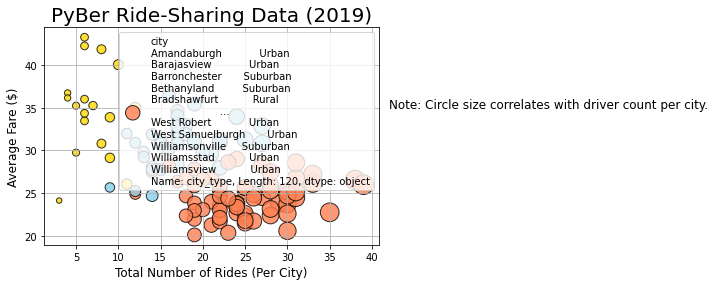

In [25]:
# Add the scatter charts for each type of city.
plt.scatter(city_agg_df['ride_count'],
      city_agg_df['avg_fare'],
      s=10*city_agg_df['ride_count'], c=city_agg_df['type_color'],
      edgecolor="black", linewidths=1,
      alpha=0.8, label=city_agg_df['city_type'])

# plt.scatter(suburban_ride_count,
#       suburban_avg_fare,
#       s=10*suburban_driver_count, c="skyblue",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Suburban")

# plt.scatter(rural_ride_count,
#       rural_avg_fare,
#       s=10*rural_driver_count, c="gold",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Rural")


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# next line: not pretty
# plt.legend()

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

#### Can't get legend to work, let's try separating into 3 like in module.

In [26]:
rural_agg_df = city_agg_df[city_agg_df['city_type'] == 'Rural']
suburban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Suburban']
urban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Urban']

In [27]:
rural_agg_df.head(2)

,ride_count,avg_fare,driver_count,city_type,sum_of_fares,type_color
city,,,,,,
Bradshawfurt,10,40.064000,7,Rural,400.64,gold
Garzaport,3,24.123333,7,Rural,72.37,gold


In [ ]:
plotmes = [[rural_agg_df, 'Rural', 'gold'], [suburban_agg_df, 'Suburban', 'skyblue'],
           [urban_agg_df, 'Urban', 'coral']]

for tripl in plotme:
    daf = tripl[0]
    plt.scatter(daf['ride_count'], daf['avg_fare'],
                s=10*daf['ride_count'], c=tripl[2],
                edgecolor="black", linewidths=1,
          alpha=0.8, label=tripl[1])   

# Add the scatter charts for each type of city.
#     plt.scatter(city_agg_df['ride_count'],
#           city_agg_df['avg_fare'],
#           s=10*city_agg_df['ride_count'], c=city_agg_df['type_color'],
#           edgecolor="black", linewidths=1,
#           alpha=0.8, label=city_agg_df['city_type'])

# plt.scatter(suburban_ride_count,
#       suburban_avg_fare,
#       s=10*suburban_driver_count, c="skyblue",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Suburban")

# plt.scatter(rural_ride_count,
#       rural_avg_fare,
#       s=10*rural_driver_count, c="gold",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Rural")


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# next line: not pretty
# plt.legend()

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

## converting dates to real date, in case anyone cares

In [19]:
import datetime

In [21]:
ride_data_df['realdate'] = ride_data_df['date'].map(lambda x: datetime.datetime.fromisoformat(x))

In [27]:
# min '2019-01-01 00:08:16' , max '2019-05-08 13:10:18'
ride_data_df['realdate'].max()

Timestamp('2019-05-08 13:10:18')

In [28]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)